In [ ]:
# https://medium.com/@vovaprivalov/hardware-exploration-on-google-colab-and-kaggle-platforms-576bf51c54e

In [ ]:
! conda install pytorch torchvision -c pytorch

In [ ]:
! pip3 install pytorch

  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
    Running setup.py install for pytorch ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-1pcdttl4/pytorch/setup.py'"'"'; __file__='"'"'/tmp/pip-install-1pcdttl4/pytorch/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-u2cqc_r3/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [ ]:
! pip3 install numpy

In [ ]:
! pip3 install pytz

In [ ]:
! pip3 install torch

In [ ]:
! mkdir data

mkdir: cannot create directory ‘data’: File exists


## Chapter 3 - Computational Graphs and Linear Models

In [ ]:
import torch

a = torch.tensor([[1,2,3],[4,5,6]], requires_grad=True, dtype=torch.float)

In [ ]:
a

tensor([[1., 2., 3.],
        [4., 5., 6.]], requires_grad=True)

In [ ]:
print(a)

tensor([[1., 2., 3.],
        [4., 5., 6.]], requires_grad=True)


In [ ]:
b = a+2

In [ ]:
b

tensor([[3., 4., 5.],
        [6., 7., 8.]], grad_fn=<AddBackward0>)

In [ ]:
a

tensor([[1., 2., 3.],
        [4., 5., 6.]], requires_grad=True)

In [ ]:
print(a.grad)

None


In [ ]:
print(a.grad_fn)

None


In [ ]:
c = 2*b*b

In [ ]:
c

tensor([[ 18.,  32.,  50.],
        [ 72.,  98., 128.]], grad_fn=<MulBackward0>)

In [ ]:
print(a.grad)

None


In [ ]:
print(a.grad_fn)

None


In [ ]:
out = c.mean()

In [ ]:
print(out)

tensor(66.3333, grad_fn=<MeanBackward0>)


In [ ]:
print(a.grad)
print(a.grad_fn)

None
None


In [ ]:
out.backward()

In [ ]:
out

tensor(66.3333, grad_fn=<MeanBackward0>)

In [ ]:
print(a.grad)

tensor([[2.0000, 2.6667, 3.3333],
        [4.0000, 4.6667, 5.3333]])


In [ ]:
print(a.grad_fn)

None


Linear Models

In [ ]:
import torch
import torch.nn as nn

class LinearModel(nn.Module):
  def __init__(self, in_dim, out_dim):
    super(LinearModel, self).__init__()  # We invoke superclass' __init__
    self.linear = nn.Linear(in_dim, out_dim)

  def forward(self, x):
    out = self.linear(x)
    return out

In [ ]:
model = LinearModel(1,1)

In [ ]:
model

LinearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
learnRate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = learnRate)
criterion = nn.MSELoss()

In [ ]:
optimiser

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [ ]:
criterion

MSELoss()

In [ ]:
print(torch.tensor([1,2,3,4,5,6,7,8,9,10], dtype=torch.float))

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])


In [ ]:
x_train = torch.tensor([1,2,3,4,5,6,7,8,9,10], dtype=torch.float).reshape(-1,1)

In [ ]:
x_train

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]])

In [ ]:
print(torch.tensor([3*x+5 for x in x_train]))

tensor([ 8., 11., 14., 17., 20., 23., 26., 29., 32., 35.])


In [ ]:
y_train = torch.tensor([3*x+5 for x in x_train]).reshape(-1,1)

In [ ]:
y_train

tensor([[ 8.],
        [11.],
        [14.],
        [17.],
        [20.],
        [23.],
        [26.],
        [29.],
        [32.],
        [35.]])

In [ ]:
epochs = 1000

inputs = x_train  # Is this only a reference copied?
labels = y_train

for epoch in range(epochs):
  # epoch += 1  this line is redundant!
  out = model(inputs)
  optimiser.zero_grad()
  loss = criterion(out, labels)
  loss.backward()
  optimiser.step()
  predicted = model.forward(x_train)
  if epoch == 10:
    predicted_e10 = model.forward(x_train)
  if epoch == 100:
    predicted_e100 = model.forward(x_train)
  if (epoch % 100) == 0:
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 614.26171875
epoch 100, loss 1.8546135425567627
epoch 200, loss 0.7993141412734985
epoch 300, loss 0.34449535608291626
epoch 400, loss 0.1484731137752533
epoch 500, loss 0.06398995220661163
epoch 600, loss 0.027579018846154213
epoch 700, loss 0.011886131949722767
epoch 800, loss 0.005122908856719732
epoch 900, loss 0.0022079492919147015


In [ ]:
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[3.0096]])), ('linear.bias', tensor([4.9334]))])


In [ ]:
torch.save(model.state_dict(), 'testmodel.pkl')

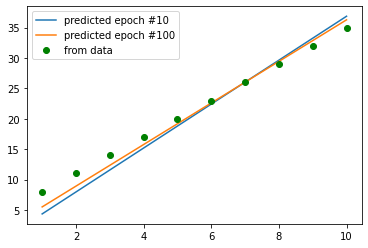

In [ ]:
import matplotlib.pyplot as plt

x = x_train.detach().numpy()
plt.plot(x, predicted_e10.detach().numpy(), label = 'predicted epoch #10')
plt.plot(x, predicted_e100.detach().numpy(), label = 'predicted epoch #100')
plt.plot(x, y_train.detach().numpy(), 'go', label = 'from data')
plt.legend()
plt.show()

In [ ]:
epochs = 1000

for epoch in range(epochs):
  # epoch += 1  this line is redundant!
  inputs = x_train   # This isn't optimal
  labels = y_train   # This isn't optimal
  out = model(inputs)
  optimiser.zero_grad()
  loss = criterion(out, labels)
  loss.backward()
  optimiser.step()
  predicted = model.forward(x_train)
  if (epoch % 100) == 0:
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 0.0009516485151834786
epoch 100, loss 0.0004101010854355991
epoch 200, loss 0.00017676074639894068
epoch 300, loss 7.617419032612815e-05
epoch 400, loss 3.2821670174598694e-05
epoch 500, loss 1.4148861737339757e-05
epoch 600, loss 6.099965048633749e-06
epoch 700, loss 2.62947719420481e-06
epoch 800, loss 1.1331239875289612e-06
epoch 900, loss 4.882717803411651e-07


In [ ]:
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[3.0001]])), ('linear.bias', tensor([4.9990]))])


In [ ]:
y_train.detach().numpy()

array([[ 8.],
       [11.],
       [14.],
       [17.],
       [20.],
       [23.],
       [26.],
       [29.],
       [32.],
       [35.]], dtype=float32)

In [ ]:
print(predicted.detach().numpy())

[[ 7.999151]
 [10.999294]
 [13.999435]
 [16.999578]
 [19.999722]
 [22.999863]
 [26.000006]
 [29.000149]
 [32.000294]
 [35.000435]]


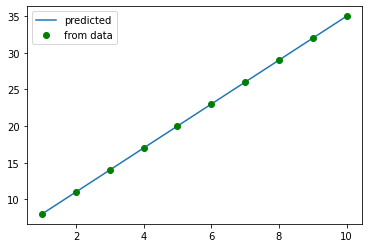

In [ ]:
import matplotlib.pyplot as plt

x = x_train.detach().numpy()
plt.plot(x, predicted.detach().numpy(), label = 'predicted')
plt.plot(x, y_train.detach().numpy(), 'go', label = 'from data')
plt.legend()
plt.show()

In [ ]:
model = LinearModel(1,1)
model.load_state_dict(torch.load('testmodel.pkl'))

<All keys matched successfully>

In [ ]:
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[3.0096]])), ('linear.bias', tensor([4.9334]))])


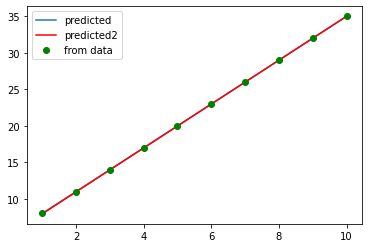

In [ ]:
predicted2 = model.forward(x_train)

# x = x_train.detach().numpy()
plt.plot(x, predicted.detach().numpy(), label = 'predicted')
plt.plot(x, predicted2.detach().numpy(), 'r', label = 'predicted2')
plt.plot(x, y_train.detach().numpy(), 'go', label = 'from data')
plt.legend()
plt.show()

In [ ]:
model_fast = LinearModel(1,1)
model_slow = LinearModel(1,1)

print(model_fast.parameters())
print(model_slow.parameters())

optimiser_fast = torch.optim.SGD(model_fast.parameters(), lr = 0.025)  # Learning rate 0.03 0.05 is too much
optimiser_slow = torch.optim.SGD(model_slow.parameters(), lr = 0.01)

# print(optimiser_fast, optimiser_slow)
# print(model_slow)

In [ ]:
epochs = 1000

inputs = x_train  # Is this only a reference copied?
labels = y_train

for epoch1 in range(epochs):
  # epoch += 1  this line is redundant!
  out = model_slow(inputs)
  optimiser_slow.zero_grad()
  loss_slow = criterion(out, labels)
  loss_slow.backward()
  optimiser_slow.step()
  predicted = model_slow.forward(x_train)
  if epoch1 == 10:
    predicted_slow_e10 = model_slow.forward(x_train)
  if epoch1 == 100:
    predicted_slow_e100 = model_slow.forward(x_train)
  if (epoch1 % 100) == 0:
    print('epoch {}, loss {}'.format(epoch1, loss_slow.item()))

for epoch2 in range(epochs):
  # epoch += 1  this line is redundant!
  out = model_fast(inputs)
  optimiser_fast.zero_grad()
  loss_fast = criterion(out, labels)
  loss_fast.backward()
  optimiser_fast.step()
  predicted = model_fast.forward(x_train)
  if epoch2 == 10:
    predicted_fast_e10 = model_fast.forward(x_train)
  if epoch2 == 100:
    predicted_fast_e100 = model_fast.forward(x_train)
  if (epoch2 % 100) == 0:
    print('epoch {}, loss {}'.format(epoch2, loss_fast.item()))

epoch 0, loss 427.9900817871094
epoch 100, loss 1.5137674808502197
epoch 200, loss 0.6524149179458618
epoch 300, loss 0.2811822295188904
epoch 400, loss 0.12118606269359589
epoch 500, loss 0.052229296416044235
epoch 600, loss 0.02250993438065052
epoch 700, loss 0.009701446630060673
epoch 800, loss 0.004181163385510445
epoch 900, loss 0.0018019953276962042
epoch 0, loss 607.7811279296875
epoch 100, loss 0.8751826286315918
epoch 200, loss 0.05324508994817734
epoch 300, loss 0.006411480717360973
epoch 400, loss 0.0007766301860101521
epoch 500, loss 9.406450408278033e-05
epoch 600, loss 1.1392337910365313e-05
epoch 700, loss 1.3799989346807706e-06
epoch 800, loss 1.6719687323529797e-07
epoch 900, loss 2.031747570185871e-08


In [ ]:
print(predicted_fast_e10)

tensor([[ 7.8546],
        [13.9875],
        [20.1204],
        [26.2532],
        [32.3861],
        [38.5190],
        [44.6519],
        [50.7847],
        [56.9176],
        [63.0505]], grad_fn=<AddmmBackward>)


In [ ]:
print(predicted_fast_e10.grad)

None


/usr/local/lib/python3.6/dist-packages/torch/tensor.py:746: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  warnings.warn("The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad "


In [ ]:
print(model_slow.state_dict())
print(model_fast.state_dict())

OrderedDict([('linear.weight', tensor([[3.0086]])), ('linear.bias', tensor([4.9398]))])
OrderedDict([('linear.weight', tensor([[3.0000]])), ('linear.bias', tensor([4.9999]))])


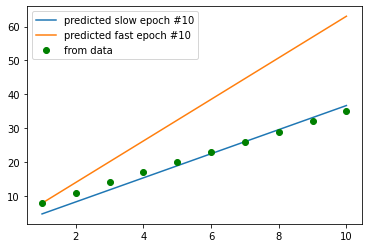

In [ ]:
x = x_train.detach().numpy()
plt.plot(x, predicted_slow_e10.detach().numpy(), label = 'predicted slow epoch #10')
plt.plot(x, predicted_fast_e10.detach().numpy(), label = 'predicted fast epoch #10')
plt.plot(x, y_train.detach().numpy(), 'go', label = 'from data')
plt.legend()
plt.show()

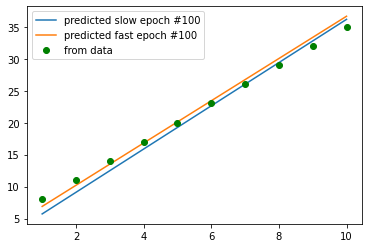

In [ ]:
plt.plot(x, predicted_slow_e100.detach().numpy(), label = 'predicted slow epoch #100')
plt.plot(x, predicted_fast_e100.detach().numpy(), label = 'predicted fast epoch #100')
plt.plot(x, y_train.detach().numpy(), 'go', label = 'from data')
plt.legend()
plt.show()

### Animated - Linear

In [ ]:
model_fast = LinearModel(1,1)
model_slow = LinearModel(1,1)

criterion = nn.MSELoss()

optimiser_fast = torch.optim.SGD(model_fast.parameters(), lr = 0.025)  # Learning rate 0.03 0.05 is too much
optimiser_slow = torch.optim.SGD(model_slow.parameters(), lr = 0.01)

x_train = torch.tensor([1,2,3,4,5,6,7,8,9,10], dtype=torch.float).reshape(-1,1)
y_train = torch.tensor([3*x+5 for x in x_train]).reshape(-1,1)

In [ ]:
def run_epochs_lin(i, inputs, labels, model1, model2, epochs=50, trace_loss=True, trace_model=True):
  
  for epoch in range(epochs):
    out_slow = model1(inputs)
    optimiser_slow.zero_grad()
    loss_slow = criterion(out_slow, labels)
    loss_slow.backward()
    optimiser_slow.step()
    predicted_slow = model1.forward(x_train)

    out_fast = model2(inputs)
    optimiser_fast.zero_grad()
    loss_fast = criterion(out_fast, labels)
    loss_fast.backward()
    optimiser_fast.step()
    predicted_fast = model2.forward(x_train)
    if trace_loss and ((epoch % 100) == 0):
      print('epoch {}, loss_slow {} loss_fast {}'.format(epoch, loss_slow.item(), loss_fast.item()))

  if trace_model:
    print(model1.state_dict(), model2.state_dict())

  epoch_label.set_text('Epoch {}'.format(i*epochs))
  x = inputs.detach().numpy()
  # plt.plot(x, predicted.detach().numpy(), 'b+', label = 'predicted')
  # plt.plot(x, labels.detach().numpy(), 'go', label = 'from data')
  line_labels.set_data(x, labels.detach().numpy())
  line_predict_slow.set_data(x, predicted_slow.detach().numpy())
  line_predict_fast.set_data(x, predicted_fast.detach().numpy())

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()
#line_predict_slow, = ax.plot([], [], 'b', label = 'predicted slow', lw=2)
line_predict_slow, = ax.plot([], [], label = 'predicted slow', lw=2)
line_predict_fast, = ax.plot([], [], label = 'predicted fast', lw=1)
line_labels, = ax.plot([], [], 'go', label = 'from data', lw=2)
ax.set_xlim(( 0, 10))
ax.set_ylim((0, 70))
epoch_label = ax.text(6.5, 5, 'Log Func training')
plt.legend()
plt.close()

# anim = animation.FuncAnimation(fig, run_epochs, frames=3, interval=1000, fargs=(x_train,y_train,model_anim,500,False), blit=True)
# This is cinematic 24fps
anim = animation.FuncAnimation(fig, run_epochs_lin, frames=50, interval=200, fargs=(x_train, y_train, model_slow, model_fast, 5, False))
rc('animation', html='jshtml')
anim

OrderedDict([('linear.weight', tensor([[3.7290]])), ('linear.bias', tensor([-0.0848]))]) OrderedDict([('linear.weight', tensor([[7.0204]])), ('linear.bias', tensor([0.7166]))])
OrderedDict([('linear.weight', tensor([[3.7152]])), ('linear.bias', tensor([0.0212]))]) OrderedDict([('linear.weight', tensor([[0.8642]])), ('linear.bias', tensor([0.0821]))])
OrderedDict([('linear.weight', tensor([[3.7003]])), ('linear.bias', tensor([0.1249]))]) OrderedDict([('linear.weight', tensor([[5.9399]])), ('linear.bias', tensor([1.0482]))])
OrderedDict([('linear.weight', tensor([[3.6857]])), ('linear.bias', tensor([0.2264]))]) OrderedDict([('linear.weight', tensor([[1.6439]])), ('linear.bias', tensor([0.6560]))])
OrderedDict([('linear.weight', tensor([[3.6714]])), ('linear.bias', tensor([0.3258]))]) OrderedDict([('linear.weight', tensor([[5.1732]])), ('linear.bias', tensor([1.3762]))])
OrderedDict([('linear.weight', tensor([[3.6574]])), ('linear.bias', tensor([0.4231]))]) OrderedDict([('linear.weight', 

Logistic Regression

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as func

class LogisticModel(nn.Module):
  def __init__(self, in_dim, out_dim):
    super(LogisticModel, self).__init__()
    self.linear = nn.Linear(in_dim, out_dim)

  def forward(self, x):
    # out = func.sigmoid(self.linear(x))
    # out = torch.sigmoid(self.linear(x))
    out = torch.torch.sigmoid(self.linear(x))
    return out

In [ ]:
model = LogisticModel(1,1)

In [ ]:
model

LogisticModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
criterion = torch.nn.BCELoss(size_average=True)
# criterion = torch.nn.BCELoss(reduction='mean')

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [ ]:
criterion

BCELoss()

In [ ]:
optimiser = torch.optim.SGD(model.parameters(), lr = 0.01)
optimiser

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [ ]:
x_train = torch.tensor([[1.6],[2.1],[1.3],[4.8],[3.5]], dtype=torch.float).reshape(-1,1)
x_train

tensor([[1.6000],
        [2.1000],
        [1.3000],
        [4.8000],
        [3.5000]])

In [ ]:
y_train = torch.tensor([[0],[0],[0],[1],[1]], dtype=torch.float).reshape(-1,1)
y_train

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.]])

In [ ]:
epochs = 20000

#inputs = x_train 
#labels = y_train

 # Is this only a reference copied?
inputs, labels = x_train, y_train 

for epoch in range(epochs):
  # epoch += 1  this line is redundant!
  out = model(inputs)
  optimiser.zero_grad()
  loss = criterion(out, labels)
  loss.backward()
  optimiser.step()
  predicted = model.forward(x_train)
  if epoch == 10:
    predicted_e10 = model.forward(x_train)
  if epoch == 100:
    predicted_e100 = model.forward(x_train)
  if epoch == 500:
    predicted_e500 = model.forward(x_train)
  if epoch == 900:
    predicted_e900 = model.forward(x_train)
  if (epoch % 1000) == 0:
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 0.80040442943573
epoch 1000, loss 0.44455844163894653
epoch 2000, loss 0.31599682569503784
epoch 3000, loss 0.24631032347679138
epoch 4000, loss 0.20312762260437012
epoch 5000, loss 0.17373451590538025
epoch 6000, loss 0.15236476063728333
epoch 7000, loss 0.1360691487789154
epoch 8000, loss 0.12319105863571167
epoch 9000, loss 0.11272917687892914
epoch 10000, loss 0.10404251515865326
epoch 11000, loss 0.09670104831457138
epoch 12000, loss 0.0904051810503006
epoch 13000, loss 0.08493925631046295
epoch 14000, loss 0.08014418929815292
epoch 15000, loss 0.07589974254369736
epoch 16000, loss 0.07211320102214813
epoch 17000, loss 0.06871186941862106
epoch 18000, loss 0.06563805043697357
epoch 19000, loss 0.06284511089324951


In [ ]:
test=torch.tensor([[0.1],[1.5],[2.3],[3.0],[6.4]])
test

tensor([[0.1000],
        [1.5000],
        [2.3000],
        [3.0000],
        [6.4000]])

In [ ]:
results = model(test)
results

tensor([[4.5924e-04],
        [2.5790e-02],
        [2.1162e-01],
        [6.7078e-01],
        [9.9997e-01]], grad_fn=<SigmoidBackward>)

In [ ]:
for result in results:
  if result <= 0.5:
    print(result.detach(), 'false')
  else: print(result, 'true')

tensor([0.0005]) false
tensor([0.0258]) false
tensor([0.2116]) false
tensor([0.6708], grad_fn=<SelectBackward>) true
tensor([1.0000], grad_fn=<SelectBackward>) true


In [ ]:
print(predicted_e10)

tensor([[0.6744],
        [0.7024],
        [0.6569],
        [0.8269],
        [0.7728]], grad_fn=<SigmoidBackward>)


In [ ]:
print(predicted_e100)

tensor([[0.5735],
        [0.5897],
        [0.5636],
        [0.6735],
        [0.6342]], grad_fn=<SigmoidBackward>)


In [ ]:
print(predicted_e500)

tensor([[0.4752],
        [0.5152],
        [0.4514],
        [0.7158],
        [0.6244]], grad_fn=<SigmoidBackward>)


In [ ]:
print(predicted_e900.detach())

tensor([[0.4066],
        [0.4687],
        [0.3706],
        [0.7754],
        [0.6416]])


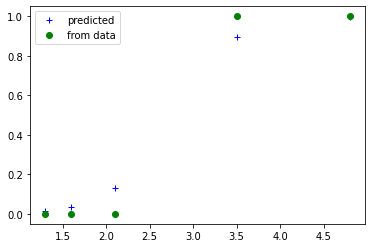

In [ ]:
import matplotlib.pyplot as plt

x = x_train.detach().numpy()
# plt.plot(x, predicted_e10.detach().numpy(), label = 'predicted epoch #10')
# plt.plot(x, predicted_e100.detach().numpy(), label = 'predicted epoch #100')
plt.plot(x, predicted.detach().numpy(), 'b+', label = 'predicted')
plt.plot(x, y_train.detach().numpy(), 'go', label = 'from data')
plt.legend()
plt.show()

In [ ]:
model_anim = LogisticModel(1,1)

print(model_anim.parameters())

criterion = torch.nn.BCELoss(size_average=True)
optimiser = torch.optim.SGD(model_anim.parameters(), lr = 0.01)

x_train = torch.tensor([[1.6],[2.1],[1.3],[4.8],[3.5]], dtype=torch.float).reshape(-1,1)
y_train = torch.tensor([[0],[0],[0],[1],[1]], dtype=torch.float).reshape(-1,1)


/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [ ]:
def run_epochs(i, inputs, labels, model, epochs=50, trace_loss=True, trace_model=True):
  
  for epoch in range(epochs):
  # epoch += 1  this line is redundant!
    out = model(inputs)
    optimiser.zero_grad()
    loss = criterion(out, labels)
    loss.backward()
    optimiser.step()
    predicted = model.forward(x_train)
    if trace_loss and ((epoch % 100) == 0):
      print('epoch {}, loss {}'.format(epoch, loss.item()))

  if trace_model:
    print(model.state_dict())

  # i(which is frame #) * epochs + epoch is the current base epoch
  # TODO: change a label that shows epoch #
  # ax.text(3,0.2,'Epoch {}'.format(i*epochs))
  # epoch_label.set('Epoch {}'.format(i*epochs))
  epoch_label.set_text('Epoch {}'.format(i*epochs))
  x = inputs.detach().numpy()
  # plt.plot(x, predicted.detach().numpy(), 'b+', label = 'predicted')
  # plt.plot(x, labels.detach().numpy(), 'go', label = 'from data')
  line_labels.set_data(x, labels.detach().numpy())
  line_predict.set_data(x, predicted.detach().numpy())
  #  plt.legend()

  # return model

In [ ]:
def run_epochs_global_model(i, inputs, labels, epochs=50, trace_loss=True, trace_model=True):
  
  for epoch in range(epochs):
  # epoch += 1  this line is redundant!
    out = model_anim(inputs)
    optimiser.zero_grad()
    loss = criterion(out, labels)
    loss.backward()
    optimiser.step()
    predicted = model.forward(x_train)
    if trace_loss and ((epoch % 100) == 0):
      print('epoch {}, loss {}'.format(epoch, loss.item()))

  if trace_model:
    print(model.state_dict())

  # i(which is frame #) * epochs + epoch is the current base epoch
  # TODO: change a label that shows epoch #
  x = inputs.detach().numpy()
  # plt.plot(x, predicted.detach().numpy(), 'b+', label = 'predicted')
  # plt.plot(x, labels.detach().numpy(), 'go', label = 'from data')
  line_labels.set_data(x, labels.detach().numpy())
  line_predict.set_data(x, predicted.detach().numpy())
  #  plt.legend()

  return model

In [ ]:
import matplotlib.pyplot as plt
# import matplotlib.animation as animation
from matplotlib import animation, rc
from IPython.display import HTML

# x = x_train.detach().numpy()
# plt.plot(x, predicted_e10.detach().numpy(), label = 'predicted epoch #10')
# plt.plot(x, predicted_e100.detach().numpy(), label = 'predicted epoch #100')
# plt.plot(x, predicted.detach().numpy(), 'b+', label = 'predicted')
# plt.plot(x, y_train.detach().numpy(), 'go', label = 'from data')
# plt.legend()

# fig = plt.figure()

fig, ax = plt.subplots()
line_predict, = ax.plot([], [], 'b+', label = 'predicted', lw=2)
line_labels, = ax.plot([], [], 'go', label = 'from data', lw=2)
ax.set_xlim(( 0.5, 5.5))
ax.set_ylim((-0.05, 1.05))
epoch_label = ax.text(3.5, 0.1, 'Log Func training')
plt.legend()
plt.close()

# anim = animation.FuncAnimation(fig, run_epochs, frames=3, interval=1000, fargs=(x_train,y_train,model_anim,500,False), blit=True)
# This is cinematic 24fps
anim = animation.FuncAnimation(fig, run_epochs, frames=200, interval=50, fargs=(x_train,y_train,model_anim,100,False, False))
rc('animation', html='jshtml')
anim
# plt.show()

# Each frame is 100 epochs, that's 1200 epochs x second 

### Multi-class classification example

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as trans

trainSet = dsets.MNIST(root='./data', train=True, transform=trans.ToTensor(), download=True)

In [ ]:
print('Number of images {}'.format(len(trainSet)))
print('Type {}'.format(type(trainSet[0][0])))
print('Size of each image {}'.format(trainSet[0][0].size()))

Number of images 60000
Type <class 'torch.Tensor'>
Size of each image torch.Size([1, 28, 28])


In [ ]:
class MultiLogisticModel(nn.Module):
  def __init__(self, in_dim, out_dim):
    super(MultiLogisticModel, self).__init__()
    self.linear = nn.Linear(in_dim, out_dim)

  def forward(self, x):
    out = self.linear(x)
    return out

In [ ]:
in_dim = 28*28
out_dim = 10

model_mlm = MultiLogisticModel(in_dim, out_dim)
criterion = nn.CrossEntropyLoss()
optimiser_mlm = torch.optim.SGD(model_mlm.parameters(), lr=0.001)

In [ ]:
print(model_mlm.parameters())

<generator object Module.parameters at 0x7f8917a2c8e0>


In [ ]:
batchSize = 100
epochs = 5

trainloader = torch.utils.data.DataLoader(dataset=trainSet, batch_size=batchSize, shuffle = True)

In [ ]:
for epoch in range(epochs):

  runningLoss = 0.0
  for i, (images, labels) in enumerate(trainloader):
    images = images.view(-1,28*28)
    optimiser_mlm.zero_grad()
    outputs = model_mlm(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimiser_mlm.step()
    runningLoss += loss.item()
  
  print(runningLoss)

1213.8386920690536
968.8217415809631
810.6067600250244
705.064472258091
631.3144236803055


This error comes out of miss-defining out_dim = 1

```
# This is formatted as code
---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
<ipython-input-8-2e5372d97223> in <module>()
      6     optimiser_mlm.zero_grad()
      7     outputs = model_mlm(images)
----> 8     loss = criterion(outputs, labels)
      9     loss.backward()
     10     optimiser_mlm.step()

3 frames
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py in nll_loss(input, target, weight, size_average, ignore_index, reduce, reduction)
   2113                          .format(input.size(0), target.size(0)))
   2114     if dim == 2:
-> 2115         ret = torch._C._nn.nll_loss(input, target, weight, _Reduction.get_enum(reduction), ignore_index)
   2116     elif dim == 4:
   2117         ret = torch._C._nn.nll_loss2d(input, target, weight, _Reduction.get_enum(reduction), ignore_index)

IndexError: Target 4 is out of bounds.
```






In [ ]:
predicted = model_mlm.forward(images)
predicted.size()

torch.Size([100, 10])

In [ ]:
print('prediction {}'.format(predicted[0]))
print('prediction {}'.format(predicted[0].detach()))
print('prediction {}'.format(predicted[0].detach().numpy()))
print('label {}'.format(labels[0]))

prediction tensor([-0.9851, -1.8588, -0.6443,  0.0804,  1.9579, -0.0758, -0.5132,  0.0891,
        -0.0494,  1.4277], grad_fn=<SelectBackward>)
prediction tensor([-0.9851, -1.8588, -0.6443,  0.0804,  1.9579, -0.0758, -0.5132,  0.0891,
        -0.0494,  1.4277])
prediction [-0.9850832  -1.8587773  -0.64425796  0.08041754  1.9579372  -0.0757962
 -0.51318     0.08914478 -0.04938443  1.4276992 ]
label 4


In [ ]:
import numpy as np

def successRate(predicted, labels):
  predict = [np.argmax(p.detach().numpy()) for p in predicted]
  actual = [labels[i].item() for i in range(len(predicted))]
  correct = [i for i, j in zip(predict, actual) if i == j]
  return(len(correct)/(len(predict)))

In [ ]:
successRate(predicted, labels)

0.86

In [ ]:
testSet = dsets.MNIST(root='./data', train=False, transform=trans.ToTensor(), download=True)
testloader = torch.utils.data.DataLoader(dataset=trainSet, batch_size=10000, shuffle=True)

testData = iter(testloader)
images, labels = testData.next()
output = model_mlm(images.view(-1,28*28))

successRate(output, labels)

0.8159

In [ ]:
print(len(output))

10000


In [ ]:
print(output[0], labels[0])

tensor([ 2.7470, -2.4224,  0.1880, -0.1969, -0.7799,  0.8968,  1.6531, -1.8974,
         0.7441, -1.4151], grad_fn=<SelectBackward>) tensor(0)
